In [1]:
from sklearn.preprocessing import OneHotEncoder
from flask import Flask, render_template, request
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from scipy.stats import zscore
# from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
# from sklearn.svm import SVR
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [2]:
def posix_time(dt):
    return (dt - datetime(1970, 1, 1)) / timedelta(seconds=1)
     

In [3]:
data = pd.read_csv('traffic_volume_data.csv')

In [5]:
data = data.sort_values(
    by=['date_time'], ascending=True).reset_index(drop=True)
last_n_hours = [1, 2, 3, 4, 5, 6]
for n in last_n_hours:
    data[f'last_{n}_hour_traffic'] = data['traffic_volume'].shift(n)
data = data.dropna().reset_index(drop=True)
data.loc[data['is_holiday'] != 'None', 'is_holiday'] = 1
data.loc[data['is_holiday'] == 'None', 'is_holiday'] = 0
data['is_holiday'] = data['is_holiday'].astype(int)

data['date_time'] = pd.to_datetime(data['date_time'])
data['hour'] = data['date_time'].map(lambda x: int(x.strftime("%H")))
data['month_day'] = data['date_time'].map(lambda x: int(x.strftime("%d")))
data['weekday'] = data['date_time'].map(lambda x: x.weekday()+1)
data['month'] = data['date_time'].map(lambda x: int(x.strftime("%m")))
data['year'] = data['date_time'].map(lambda x: int(x.strftime("%Y")))


In [6]:
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')
data = pd.read_csv("traffic_volume_data.csv")
data = data.sample(10000).reset_index(drop=True)
label_columns = ['weather_type', 'weather_description']
numeric_columns = ['is_holiday', 'temperature',
                       'weekday', 'hour', 'month_day', 'year', 'month']
     

In [7]:
features = numeric_columns+label_columns
X = data[features]
X.head()

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,1,292.280,5,2,25,2014,7,Clouds,scattered clouds
1,1,263.900,5,19,10,2017,3,Clouds,scattered clouds
2,1,286.430,2,10,30,2013,4,Clouds,scattered clouds
3,1,272.210,4,18,25,2016,2,Clouds,overcast clouds
4,1,295.209,7,11,17,2016,7,Rain,light rain


In [8]:
X.shape

(10000, 9)

In [9]:
from functools import reduce
def unique(list1):
    ans = reduce(lambda re, x: re+[x] if x not in re else re, list1, [])
    print(ans)

n1 = data['weather_type']
n2 = data['weather_description']
unique(n1)
unique(n2)
n1features = ['Rain', 'Clouds', 'Clear', 'Snow', 'Mist',
              'Drizzle', 'Haze', 'Thunderstorm', 'Fog', 'Smoke', 'Squall']
n2features = ['light rain', 'few clouds', 'Sky is Clear', 'light snow', 'sky is clear', 'mist', 'broken clouds', 'moderate rain', 'drizzle', 'overcast clouds', 'scattered clouds', 'haze', 'proximity thunderstorm', 'light intensity drizzle', 'heavy snow', 'heavy intensity rain', 'fog', 'heavy intensity drizzle', 'shower snow', 'snow', 'thunderstorm with rain',
              'thunderstorm with heavy rain', 'thunderstorm with light rain', 'proximity thunderstorm with rain', 'thunderstorm with drizzle', 'smoke', 'thunderstorm', 'proximity shower rain', 'very heavy rain', 'proximity thunderstorm with drizzle', 'light rain and snow', 'light intensity shower rain', 'SQUALLS', 'shower drizzle', 'thunderstorm with light drizzle']
"""#Data Preparation"""

n11 = []
n22 = []
for i in range(10000):
    if(n1[i]) not in n1features:
        n11.append(0)
    else:
        n11.append((n1features.index(n1[i]))+1)
    if n2[i] not in n2features:
        n22.append(0)
    else:
        n22.append((n2features.index(n2[i]))+1)
# print(n11)
# print(n22)
data['weather_type'] = n11
data['weather_description'] = n22

     
['Clouds', 'Clear', 'Snow', 'Rain', 'Thunderstorm', 'Mist', 'Drizzle', 'Haze', 'Fog', 'Smoke', 'Squall']
['broken clouds', 'overcast clouds', 'sky is clear', 'light snow', 'moderate rain', 'proximity thunderstorm', 'Sky is Clear', 'light rain', 'mist', 'drizzle', 'haze', 'proximity thunderstorm with drizzle', 'scattered clouds', 'heavy intensity rain', 'few clouds', 'light intensity drizzle', 'fog', 'snow', 'heavy snow', 'thunderstorm', 'heavy intensity drizzle', 'proximity thunderstorm with rain', 'thunderstorm with light rain', 'smoke', 'proximity shower rain', 'thunderstorm with heavy rain', 'light rain and snow', 'thunderstorm with rain', 'very heavy rain', 'sleet', 'light intensity shower rain', 'thunderstorm with light drizzle', 'SQUALLS', 'light shower snow']

['Clouds', 'Rain', 'Clear', 'Mist', 'Snow', 'Haze', 'Fog', 'Thunderstorm', 'Drizzle', 'Squall', 'Smoke']
['scattered clouds', 'overcast clouds', 'light rain', 'sky is clear', 'mist', 'moderate rain', 'heavy snow', 'haze', 'fog', 'thunderstorm with light rain', 'light snow', 'Sky is Clear', 'broken clouds', 'snow', 'few clouds', 'drizzle', 'heavy intensity rain', 'proximity thunderstorm', 'light intensity drizzle', 'light intensity shower rain', 'SQUALLS', 'proximity shower rain', 'proximity thunderstorm with drizzle', 'thunderstorm', 'proximity thunderstorm with rain', 'thunderstorm with heavy rain', 'thunderstorm with drizzle', 'heavy intensity drizzle', 'thunderstorm with rain', 'smoke', 'thunderstorm with light drizzle', 'very heavy rain', 'light rain and snow']


['broken clouds',
 'overcast clouds',
 'sky is clear',
 'light snow',
 'moderate rain',
 'proximity thunderstorm',
 'Sky is Clear',
 'light rain',
 'mist',
 'drizzle',
 'haze',
 'proximity thunderstorm with drizzle',
 'scattered clouds',
 'heavy intensity rain',
 'few clouds',
 'light intensity drizzle',
 'fog',
 'snow',
 'heavy snow',
 'thunderstorm',
 'heavy intensity drizzle',
 'proximity thunderstorm with rain',
 'thunderstorm with light rain',
 'smoke',
 'proximity shower rain',
 'thunderstorm with heavy rain',
 'light rain and snow',
 'thunderstorm with rain',
 'very heavy rain',
 'sleet',
 'light intensity shower rain',
 'thunderstorm with light drizzle',
 'SQUALLS',
 'light shower snow']

In [10]:
features = numeric_columns+label_columns
target = ['traffic_volume']
X = data[features]
y = data[target]

In [11]:
X.head(6)

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,1,292.280,5,2,25,2014,7,2,11
1,1,263.900,5,19,10,2017,3,2,11
2,1,286.430,2,10,30,2013,4,2,11
3,1,272.210,4,18,25,2016,2,2,10
4,1,295.209,7,11,17,2016,7,1,1
5,1,264.470,1,6,6,2017,2,3,5


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


[[<AxesSubplot:title={'center':'is_holiday'}>
  <AxesSubplot:title={'center':'temperature'}>
  <AxesSubplot:title={'center':'weekday'}>]
 [<AxesSubplot:title={'center':'hour'}>
  <AxesSubplot:title={'center':'month_day'}>
  <AxesSubplot:title={'center':'year'}>]
 [<AxesSubplot:title={'center':'month'}>
  <AxesSubplot:title={'center':'weather_type'}>
  <AxesSubplot:title={'center':'weather_description'}>]]


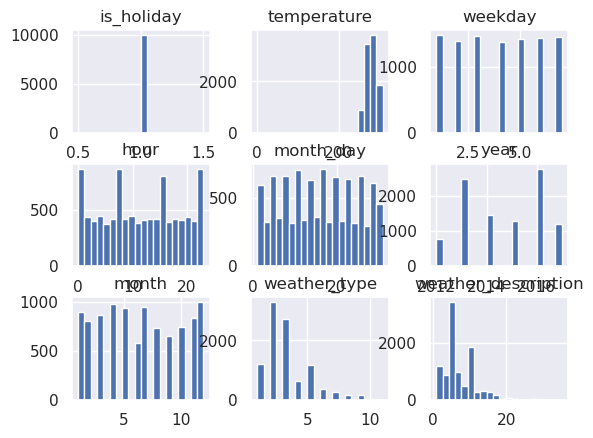

In [12]:
print(data[features].hist(bins=20,))

In [13]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y).flatten()
warnings.filterwarnings('ignore')
     


In [14]:
print(X[:5])

[[0.         0.94822216 0.66666667 0.08695652 0.8        0.4
  0.54545455 0.1        0.29411765]
 [0.         0.85615105 0.66666667 0.82608696 0.3        1.
  0.18181818 0.1        0.29411765]
 [0.         0.92924345 0.16666667 0.43478261 0.96666667 0.2
  0.27272727 0.1        0.29411765]
 [0.         0.88311056 0.5        0.7826087  0.8        0.8
  0.09090909 0.1        0.26470588]
 [0.         0.9577245  1.         0.47826087 0.53333333 0.8
  0.54545455 0.         0.        ]]


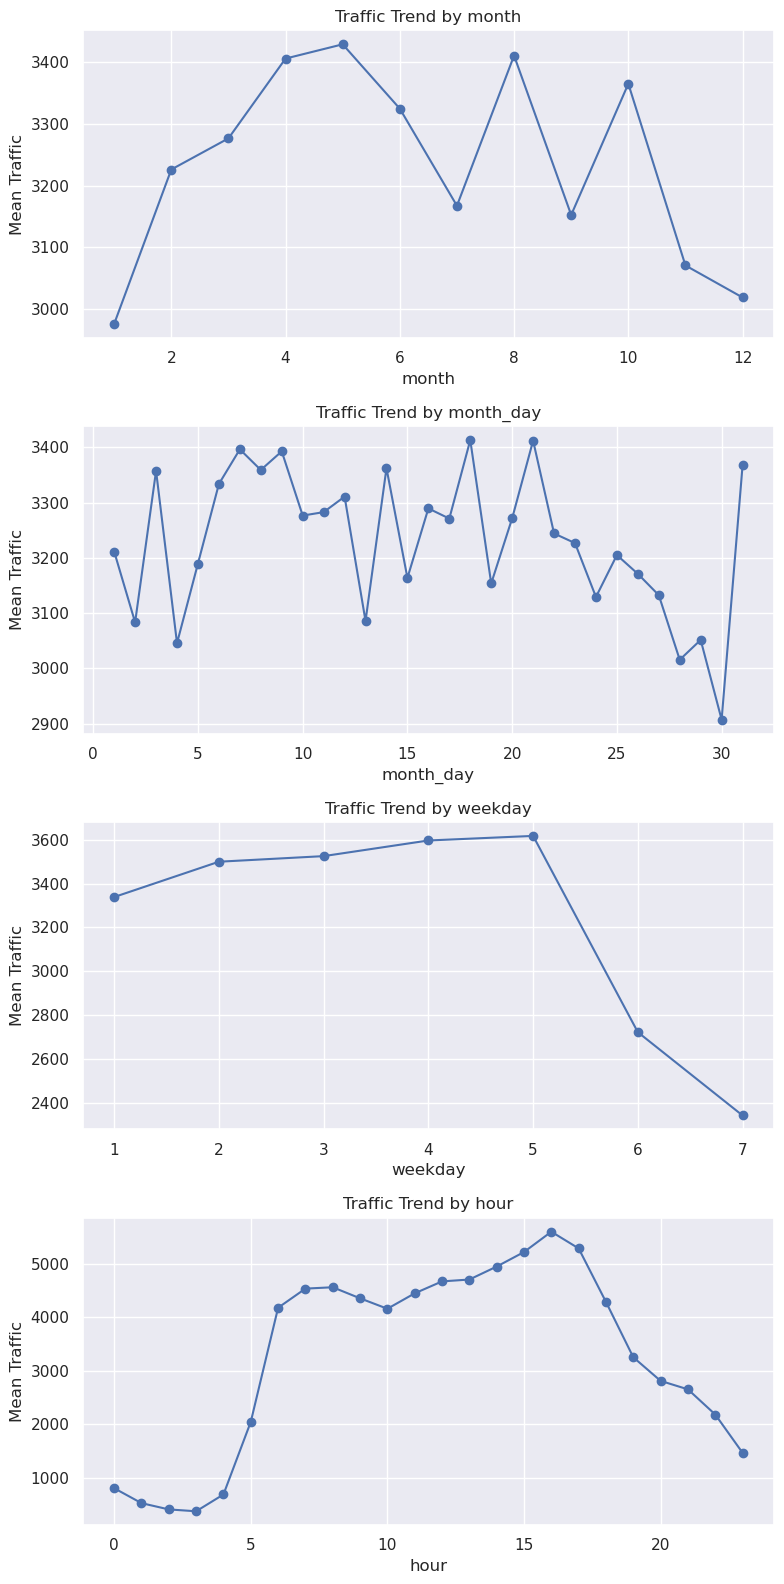

In [15]:
metrics = ['month', 'month_day', 'weekday', 'hour']
fig = plt.figure(figsize=(8, 4*len(metrics)))
for i, metric in enumerate(metrics):
	ax = fig.add_subplot(len(metrics), 1, i+1)
	ax.plot(data.groupby(metric)['traffic_volume'].mean(), '-o')
	ax.set_xlabel(metric)
	ax.set_ylabel("Mean Traffic")
	ax.set_title(f"Traffic Trend by {metric}")
plt.tight_layout()
plt.show()

In [16]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X, y)
new = []
print('predicted output :=',regr.predict(X[:10]))
print('Actual output :=',y[:10])
     


predicted output := [0.10261608 0.56882601 0.74490034 0.61477521 0.48478367 0.54942392
 0.12424235 0.11410529 0.70142886 0.26161434]
Actual output := [0.05909905 0.52321256 0.6254305  0.72034716 0.5072324  0.77490012
 0.11392754 0.10194242 0.84446894 0.17426643]


In [17]:

# error eval
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)
y_pred = regr.predict(testX)
print('Mean Absolute Error:', mean_absolute_error(testY, y_pred))
##############################
     

Mean Absolute Error: 0.0741475860868352


In [18]:
print(features)
     
['is_holiday', 'humidity', 'wind_speed', 'temperature', 'weekday', 'hour', 'month_day', 'year', 'month']

['is_holiday', 'temperature', 'weekday', 'hour', 'month_day', 'year', 'month', 'weather_type', 'weather_description']


['is_holiday',
 'humidity',
 'wind_speed',
 'temperature',
 'weekday',
 'hour',
 'month_day',
 'year',
 'month']

In [19]:
data[features].head(5)

,is_holiday,temperature,weekday,hour,month_day,year,month,weather_type,weather_description
0,1,292.280,5,2,25,2014,7,2,11
1,1,263.900,5,19,10,2017,3,2,11
2,1,286.430,2,10,30,2013,4,2,11
3,1,272.210,4,18,25,2016,2,2,10
4,1,295.209,7,11,17,2016,7,1,1


In [20]:
# Take input from the user for each data point
hol = float(input("Enter the holidays(0 for no and 1 for yes): "))
tem = float(input("Enter the temperature: "))
week_d = float(input("Enter the weekday(1 for monday and 7 for sunday): "))
hour = float(input("Enter the hour (not more than 24): "))
mon_d = float(input("Enter the month date: "))
year = float(input("Enter the year: "))
mon = float(input("Enter the month: "))
wea_t = float(input("Enter the type of weather( either of these:1, 3, 7, 2, 6, 9, 5, 4, 8, 11, 10): "))
wea_d = float(input("Enter the weather description(either of this:1, 5, 12, 11, 3, 14, 7, 17, 6, 10, 15, 8, 22, 2, 9, 4, 16, 24, 27, 20, 18, 13, 23, 28, 21, 29, 30, 33, 35, 26, 32, 19, 34, 31, 0): "))

# Create the input_data as a tuple
ip = (hol, tem, week_d, hour, mon_d, year, mon, wea_t, wea_d)

# Convert the input_data to a NumPy array and reshape it
#ip = np.asarray(input_data)
#reshapes = in_data_array.reshape(1, -1)

# Assuming you have already defined the model3 object and trained the model
#prediction = model1.predict(reshapes)

# Check the prediction and display the result
#print(prediction)
#if prediction[0] == 0:
    #print('The person does not have a heart disease.')
#else:
   # print('The person has a heart disease.')


Enter the holidays(0 for no and 1 for yes): 1
Enter the temperature: 67
Enter the weekday(1 for monday and 7 for sunday): 6
Enter the hour (not more than 24): 7
Enter the month date: 5
Enter the year: 7899
Enter the month: 68
Enter the type of weather( either of these:1, 3, 7, 2, 6, 9, 5, 4, 8, 11, 10): 677
Enter the weather description(either of this:1, 5, 12, 11, 3, 14, 7, 17, 6, 10, 15, 8, 22, 2, 9, 4, 16, 24, 27, 20, 18, 13, 23, 28, 21, 29, 30, 33, 35, 26, 32, 19, 34, 31, 0): 68


In [21]:

ip = x_scaler.transform([ip])
out=regr.predict(ip)
print('Before inverse Scaling :',out)

Before inverse Scaling : [218.69360819]


In [22]:
y_pred = y_scaler.inverse_transform([out])
print('Traffic Volume : ',y_pred)

Traffic Volume :  [[1587497.90183835]]


In [23]:
if(y_pred<=1000):
  print("No Traffic ")
elif y_pred>1000 and y_pred<=3000:
  print("Busy or Normal Traffic")
elif y_pred>3000 and y_pred<=5500:
  print("heavy Traffic")
else:
  print("Worst case")
     

Worst case


In [24]:
# Take input from the user for each data point
hol = float(input("Enter the holidays(0 for no and 1 for yes): "))
tem = float(input("Enter the temperature: "))
week_d = float(input("Enter the weekday(1 for monday and 7 for sunday): "))
hour = float(input("Enter the hour (not more than 24): "))
mon_d = float(input("Enter the month date: "))
year = float(input("Enter the year: "))
mon = float(input("Enter the month: "))
wea_t = float(input("Enter the type of weather( either of these:1, 3, 7, 2, 6, 9, 5, 4, 8, 11, 10): "))
wea_d = float(input("Enter the weather description(either of this:1, 5, 12, 11, 3, 14, 7, 17, 6, 10, 15, 8, 22, 2, 9, 4, 16, 24, 27, 20, 18, 13, 23, 28, 21, 29, 30, 33, 35, 26, 32, 19, 34, 31, 0): "))

# Create the input_data as a tuple
ip = (hol, tem, week_d, hour, mon_d, year, mon, wea_t, wea_d)


Enter the holidays(0 for no and 1 for yes): 0
Enter the temperature: 678
Enter the weekday(1 for monday and 7 for sunday): 4
Enter the hour (not more than 24): 7
Enter the month date: 4
Enter the year: 7909
Enter the month: 4
Enter the type of weather( either of these:1, 3, 7, 2, 6, 9, 5, 4, 8, 11, 10): 3
Enter the weather description(either of this:1, 5, 12, 11, 3, 14, 7, 17, 6, 10, 15, 8, 22, 2, 9, 4, 16, 24, 27, 20, 18, 13, 23, 28, 21, 29, 30, 33, 35, 26, 32, 19, 34, 31, 0): 31


In [25]:
ip = x_scaler.transform([ip])
out=regr.predict(ip)
print('Before inverse Scaling :',out)

Before inverse Scaling : [208.08363764]


In [26]:
y_pred = y_scaler.inverse_transform([out])
print('Traffic Volume : ',y_pred)

Traffic Volume :  [[1510480.12560763]]


In [27]:
if(y_pred<=1000):
  print("No Traffic ")
elif y_pred>1000 and y_pred<=3000:
  print("Busy or Normal Traffic")
elif y_pred>3000 and y_pred<=5500:
  print("heavy Traffic")
else:
  print("Worst case")
     

Worst case
